<a href="https://colab.research.google.com/github/Mychoyce/Gomycode-Checkpoints/blob/main/major_concepts_of_supervised_and_unsupervised_machine_learning_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation

Instructions

Part1: supervised learning

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters
Part2: unsupervised learning

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

# Part 1: Supervised Learning

In [1]:
import pandas as pd
import numpy as np


In [ ]:
# Load the dataset
data = pd.read_csv("/content/Microsoft_malware_dataset_min.csv")
print(data)


In [ ]:
# Display general information about the dataset
print(data.head())

In [ ]:
print(data.info())

In [ ]:
print(data.shape)

Pandas Profiling Report:

In [ ]:
!pip install pandas-profiling

In [ ]:
profile = ProfileReport(data)
profile.to_file("data_microsoft")

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
!pip install matplotlib

In [ ]:
!pip install --upgrade Pillow

In [ ]:
# Check for missing values
print(data.isnull().sum())


In [ ]:
data.dropna(inplace=True)

In [ ]:
# Check for duplicates
print(data.duplicated().sum())


In [ ]:
 #Handle Outliers (Example: Using Z-score)
from scipy import stats
import seaborn as sns


In [ ]:
# Check the data types of all columns
print(data.dtypes)

In [4]:
# Encode Categorical Features
data_encoded = pd.get_dummies(data)


In [3]:
# Prepare Dataset for Modeling
from sklearn.model_selection import train_test_split

In [ ]:
data.info()

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [12]:
for column in ['Census_OSEdition', 'OsPlatformSubRelease']:
    data[column] = label_encoder.fit_transform(data[column])

In [8]:
# romove outliers
Q3 = data.quantile(0.25)
Q8 = data.quantile(0.75)
IQR = Q8 - Q3
data = data[~((data < (Q3 - 1.5 * IQR)) |(data > (Q8 + 1.5 * IQR))).any(axis=1)]

In [18]:
target_variable = 'HasDetections'
feature_variable = ['Wdft_IsGamer', 'Census_IsVirtualDevice','Census_OSEdition','Census_HasOpticalDiskDrive',   'Firewall','SMode','IsProtected',   'OsPlatformSubRelease','CountryIdentifier']

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
y = data[target_variable]
X = data[feature_variable].values

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(14175, 9)

In [23]:
y_train.shape

(14175,)

Apply Decision Tree and Plot ROC Curve:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [36]:
import numpy as np

X=("NaN values in X_train:", np .isnan(X_train).any())

In [38]:
# Check if X_train contains NaN values
print(np.isnan(X_train).any())

# Check if X_test contains NaN values
print(np.isnan(X_test).any())

True
True


In [39]:
from sklearn.impute import SimpleImputer

In [40]:
# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [41]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
#applying tree algorithm
tree.fit(X_train, y_train)  # fitting our model
y_pred = tree.predict(X_test)  # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.529627539503386


In [44]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

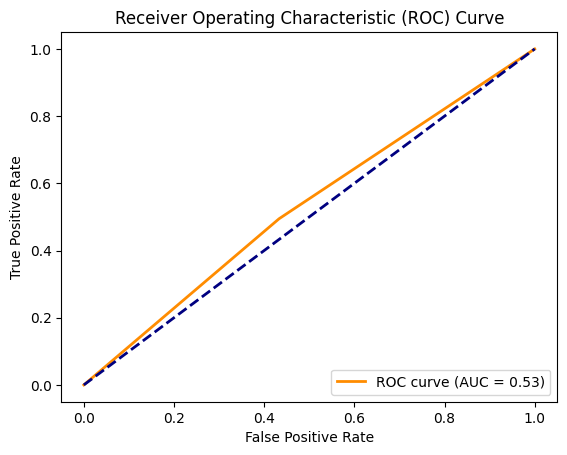

In [45]:
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV


In [47]:
# Define hyperparameters grid
param_grid = {
    'max_depth': [None,10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [50]:
# Perform grid search
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [51]:
# Get best parameters
best_params = grid_search.best_params_


In [53]:
# Train Decision Tree with best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

# Part 2: Unsupervised Learning

In [61]:
print(data.columns)

Index(['HasDetections', 'Wdft_IsGamer', 'Census_IsVirtualDevice',
       'Census_OSEdition', 'Census_HasOpticalDiskDrive', 'Firewall', 'SMode',
       'IsProtected', 'OsPlatformSubRelease', 'CountryIdentifier'],
      dtype='object')


In [70]:
data['HasDection'] = None  # Assign values to the column

In [54]:
#Drop Target Variable:

In [72]:
 #Drop target variable for unsupervised
 X_unsupervised = data.drop(columns=['HasDection'], inplace=True)

Apply K-Means Clustering and Plot Clusters:

In [ ]:
import numpy as np

print(np.isnan(data).any())

In [77]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
data = imputer.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)  # You can choose the number of clusters based on your analysis
kmeans.fit(data)

In [80]:
# Convert the NumPy array to a Pandas DataFrame
data_df = pd.DataFrame(data)

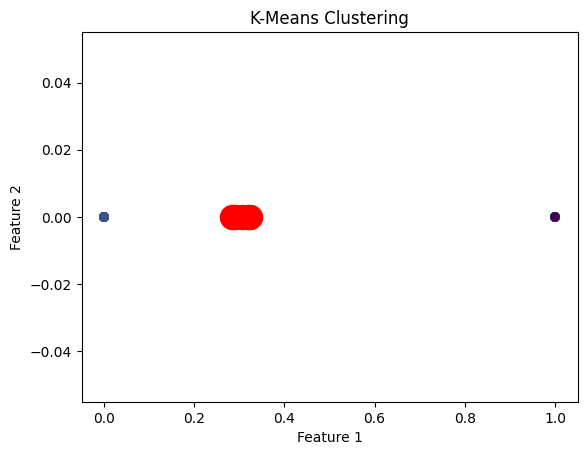

In [81]:
# Plot clusters
plt.scatter(data_df.iloc[:, 0], data_df.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()